# Nilesh Shinde

In [3]:
from sklearn.datasets import fetch_openml

# Fetching the data

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
x = mnist['data']

In [6]:
y = mnist['target']


In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline
import numpy as np

In [10]:
import matplotlib 
import matplotlib.pyplot as plt

In [11]:
# some_digit = x[36000] --> this wont work 
#insted of that use --> # instead of some_digit = X[0]
#                         some_digit = X.to_numpy()[0]
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28,28) #for reshape the dataframe

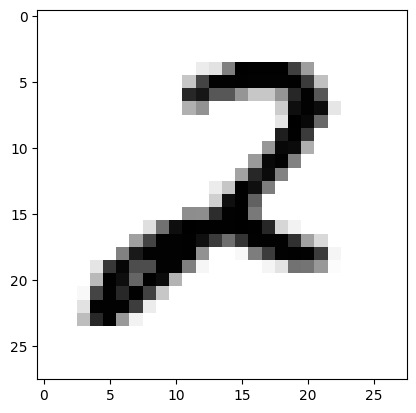

In [12]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary ,  interpolation ='nearest')
# plt.axis("off") ---> This line wont work

In [13]:
y[36001]

'2'

In [14]:
y[36001]

'2'

In [15]:
y[36009]

'2'

In [16]:
x_train = x[:60000]

In [17]:
x_test = x[60000:]

In [18]:
y_train = y[:60000]

In [19]:
y_test = y[60000:]

for shuffle the data

In [20]:
shuffle_index = np.random.permutation(60000)

In [21]:
x_train = x_train.to_numpy()[shuffle_index]

In [22]:
y_train = y_train.to_numpy()[shuffle_index]

to_numpy() -->Convert the DataFrame to a NumPy array. By default, the dtype of the returned array will be the common NumPy                   dtype of all types in the DataFrame.

## Creating a 2 detector

In [23]:

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train ==2)
y_test_2 = (y_test==2)

.astype(np.int) --> It convert False --> 0 and True ---> 1

In [24]:
y_train_2

array([False, False, False, ..., False, False, False])

In [25]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(x_train,y_train_2)

c:\Users\niles\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
clf.predict([some_digit])

array([ True])

# cross validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

c:\Users\niles\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\niles\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [32]:
a.mean()*100

97.84

# Quiz 

Creating a classifier which will classify a digit always as "not 2"
accuracy ---> >90%

# Model saving

In [33]:

import pickle
  
# Save the trained model as a pickle string.
hand_writting_recogniser_model = pickle.dumps(clf)
  
# Load the pickled model
clf_from_pickle = pickle.loads(hand_writting_recogniser_model)

clf_from_pickle.predict([some_digit])

array([ True])

saved model is ---> hand_writting_recogniser_model